# Implementation of Perelson et al.

In this implementation we're going to evaluate the properties of a [dynamical model](http://science.sciencemag.org/content/271/5255/1582).

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import neurokit2

### (1) Reproduce all four panels from Figure 1 shown in Perelson et al. using eq. 6

Since we are not given any empirical data, use the fitted parameters and the appropriate constants to generate the curves shown on these plots. Remember to account for the time delays for each patient.

#### (i) Implement eq. 6 from the paper as a function.

In [25]:
def plasmavirion(V0,t,c,d): 
    
    x = c/(c-d)
    VI = V0*np.exp(-c*t)
    VNI = x*V0*(x*(np.exp(-d*t)-np.exp(-c*t))-d*t*np.exp(-c*t))
    V = VI + VNI
    array = np.array([VI,VNI,V])
    return array

[0.25       1.39285714 2.53571429 3.67857143 4.82142857 5.96428571
 7.10714286 8.25      ]


#### (ii) Make the plot from this function's values over time.

Note that some constants are given in other papers published by this lab. An estimate of k, the viral infectivity rate, can be found in Wein et al. (J. Theor. Biol. 192:81-98) to be $3.43\times10^{-8}$ mL/(virion•day). Note that you will need to solve ordinary differential equations for $T^*$, $V_I$, and $V_{NI}$ to reproduce the data in Figure 1.

Text(0.5, 1.0, 'Figure 1A top left patient 104')

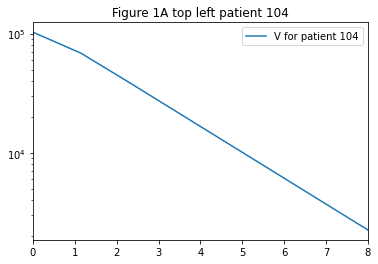

In [51]:
#for patient 104 
k = (3.43e-8)
c = (3.68)
T0 = 11000
V0 = 52000
d = (.5)
e = k*T0
f = N*d
for i in range(n):
    delay = t[i] + .25
    infectivity = 2*plasmavirion(V0,delay,c,d)
    Vstep104[i,:] = infectivity 
    VstepVI104[i] = Vstep104[i,0]
    VstepVNI104[i] = Vstep104[i,1]
    VstepV104[i] = Vstep104[i,2]

plt.plot(t,VstepV104, label = 'V for patient 104')
plt.yscale('log')
plt.xlim(0,8)
plt.legend()
plt.title('Figure 1A top left patient 104')

Text(0.5, 1.0, 'Figure 1A bottom left patient 107')

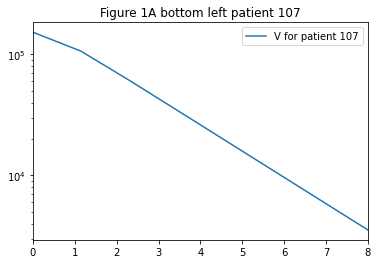

In [53]:
#for patient 104 
k = (3.43e-8)
c = (3.09)
T0 = 412000
V0 = 77000
d = (.5)
e = k*T0
f = N*d
for i in range(n):
    delay = t[i] + .25
    infectivity = 2*plasmavirion(V0,delay,c,d)
    Vstep104[i,:] = infectivity 
    VstepVI104[i] = Vstep104[i,0]
    VstepVNI104[i] = Vstep104[i,1]
    VstepV104[i] = Vstep104[i,2]

plt.plot(t,VstepV104, label = 'V for patient 107')
plt.yscale('log')
plt.xlim(0,8)
plt.legend()
plt.title('Figure 1A bottom left patient 107')

[[7.68385765e+05 5.11951965e+05 1.28033773e+06]
 [7.29669202e+04 9.09469915e+05 9.82436835e+05]
 [6.92903446e+03 5.82940589e+05 5.89869624e+05]
 [6.57990202e+02 3.28877692e+05 3.29535683e+05]
 [6.24836128e+01 1.80728635e+05 1.80791119e+05]
 [5.93352584e+00 9.87639275e+04 9.87698610e+04]
 [5.63455397e-01 5.39097166e+04 5.39102801e+04]
 [5.35064637e-02 2.94194022e+04 2.94194557e+04]]


Text(0.5, 1.0, 'patient 105')

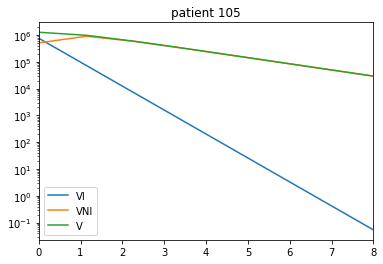

In [48]:
c = 2.06
N = 12.9
k = 3.43e-8
d = .53
V0 = 643000
T0 = 11000
infectivity = np.zeros(1000)

n = 8
t = np.linspace(0,8,8)
Vstep = np.zeros((n,3))
VstepVI = np.zeros(8)
VstepVNI = np.zeros(8)
VstepV = np.zeros(8)


for i in range(n):
    delay = t[i] + .25
    infectivity = 2*plasmavirion(V0,delay,c,d)
    Vstep[i,:] = infectivity 
    VstepVI[i] = Vstep[i,0]
    VstepVNI[i] = Vstep[i,1]
    VstepV[i] = Vstep[i,2]
print(Vstep)

plt.plot(t,VstepVI,label = 'VI')
plt.plot(t,VstepVNI,label = 'VNI')
plt.plot(t,VstepV, label = 'V')
plt.yscale('log')
plt.xlim(0,8)
plt.legend()
plt.title('patient 105')



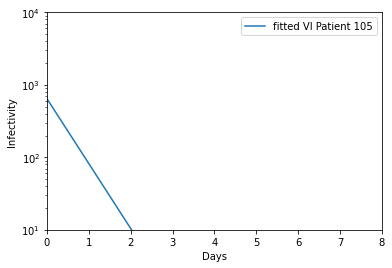

In [54]:
fig1 = plt.figure(1)
ax1 = fig1.gca()
plt.ylim(10,1e4)
plt.xlim(0,8)
plt.yscale('log')
ax1.plot(t,VstepVI/1.2e3,label = 'fitted VI Patient 105')
plt.ylabel('Infectivity')
plt.xlabel('Days')
plt.legend()

### (2) Can the model of virion production before treatment show stable or unstable oscillations


In [4]:
#patient 102
array = np.zeros((2,2))
k = (3.43e-8)
c = (3.81)
T0 = 11000
d = (.26)
e = k*T0
f = N*d
array[0,0] = -d
array[0,1] = e
array[1,0] = f
array[1,1] = -c
_,eig = np.linalg.eig(array)
print('for patient 102 eigenvalues are:',eig)

#patient 103
array = np.zeros((2,2))
k = (3.43e-8)
c = (2.73)
T0 = 11000
d = (.68)
e = k*T0
f = N*d
array[0,0] = -d
array[0,1] = e
array[1,0] = f
array[1,1] = -c
_,eig = np.linalg.eig(array)
print('for patient 103 eigenvalues are:',eig)

#patient 104
array = np.zeros((2,2))
k = (3.43e-8)
c = (3.68)
T0 = 11000
V0 = 52000
d = (.5)
e = k*T0
f = N*d
array[0,0] = -d
array[0,1] = e
array[1,0] = f
array[1,1] = -c
_,eig = np.linalg.eig(array)
print('for patient 104 eigenvalues are:',eig)

#patient 105
k = (3.43e-8)
c = (2.06)
T0 = 11000
V0 = 
d = (.53)
e = k*T0
f = N*d
array = np.zeros((2,2))
array[0,0] = -d
array[0,1] = e
array[1,0] = f
array[1,1] = -c

_,eig = np.linalg.eig(array)
print('for patient 105 eigenvalues are:',eig)

#patient 107
array = np.zeros((2,2))
k = (3.43e-8)
c = (3.09)
T0 = 11000
d = (.5)
e = k*T0
f = N*d
array[0,0] = -d
array[0,1] = e
array[1,0] = f
array[1,1] = -c
_,eig = np.linalg.eig(array)
print('for patient 107 eigenvalues are:',eig)

#In all of these cases, there are no imaginary eigenvalues. Thus, we can conclude there are no 
#oscillations in the model. 



for patient 102 eigenvalues are: [[ 7.26922633e-01 -1.06271020e-04]
 [ 6.86719364e-01  9.99999994e-01]]
for patient 103 eigenvalues are: [[ 2.27736281e-01 -1.83904058e-04]
 [ 9.73722849e-01  9.99999983e-01]]
for patient 104 eigenvalues are: [[ 4.42286128e-01 -1.18619259e-04]
 [ 8.96874005e-01  9.99999993e-01]]
for patient 105 eigenvalues are: [[ 2.18609957e-01 -2.46330150e-04]
 [ 9.75812321e-01  9.99999970e-01]]
for patient 107 eigenvalues are: [[ 3.72746990e-01 -1.45622864e-04]
 [ 9.27933015e-01  9.99999989e-01]]


### (3) Reimplement the model relaxing the assumption about T remaining constant by numerically solving the system of ODEs.

#### i. Define a function that takes each parameter as a vector and outputs the time derivative of each species.

In [5]:
t = np.linspace(0,8,8)
def derivative(values,t,k,c,d,N,gnu):
    T0,Tstar0,VI0,VNI0 = values 
    fprime = np.zeros(4)
    
    Tstarprime = (k*VI0*(T0))-(d*Tstar0)
    Tprime = -1*Tstarprime
    VIprime = -c*VI0+(1-gnu)*N*d*Tstar0
    VNIprime = (N*d*Tstar0)*gnu-(c*VNI0)
    
    fprime[0]=Tprime 
    fprime[1]=Tstarprime
    fprime[2]=VIprime 
    fprime[3]=VNIprime
    return fprime

#### ii. Use odeint to solve this system of equations numerically for patient 105.

Hint: For ease later, it may be helpful to make a function here that handles everything but takes in gnu.

In [11]:
def myodeint(c,d,V0,T0,t,gnu):
    k = 3.43e-8
    c = 2.06
    N = c/(k*T0)
    d = .53
    VI0 = V0
    VNI0 = 0
    Tstar0 = (c*VI0)/(N*d)
    initial = [T0,Tstar0,VI0,VNI0]
    ODEsol = odeint(derivative,initial,t, args=(k,c,d,N,gnTu))
    return ODEsol

In [10]:
def myodeint3(c,d,V0,T0,t,gnu):
    k = 3.43e-8
    N = c/(k*T0)
    VI0 = V0
    VNI0 = 0
    Tstar0 = (c*VI0)/(N*d)
    initial = [T0,Tstar0,VI0,VNI0]
    ODEsol = 2*(odeint(derivative,initial,t, args=(k,c,d,N,gnu)))
    return ODEsol

#### iii. Reproduce the subpanels of Fig. 1 with this updated model. 

Figure 1A


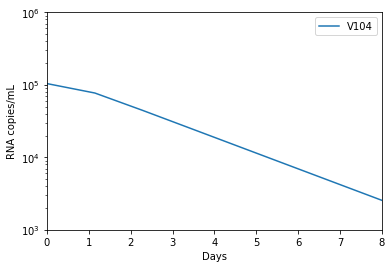

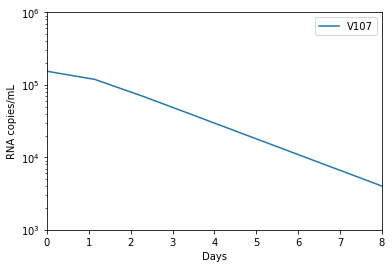

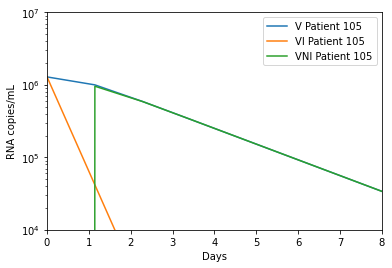

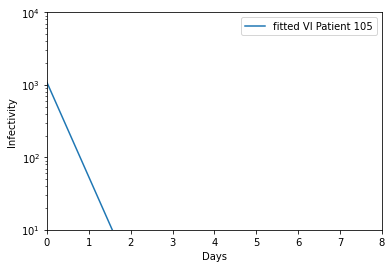

In [55]:
delay104 = np.zeros(8)
for i in range(8):
    delay104[i] = t[i] + .083
delay107 = np.zeros(8)
for i in range(8):
    delay107[i] = t[i] + .083
delay = np.zeros(8)
for i in range(8):
    delay[i] = t[i] + .25
    
print('Figure 1A')
ODEsol104 = myodeint3(3.68,.5,52000,2000,delay104,1)
V104 = (ODEsol104[:,2]+ODEsol104[:,3])
fig3 = plt.figure(3)
ax3 = fig3.gca()
ax3.plot(t,V104,label = 'V104')
plt.legend()
plt.yscale('log')
plt.ylim(1e3,1e6)
plt.xlim(0,8)
plt.xlabel('Days')
plt.ylabel('RNA copies/mL')

ODEsol107 = myodeint3(3.09,.5,77000,412000,delay107,1)
V107 = (ODEsol107[:,2]+ODEsol107[:,3])
fig4 = plt.figure(4)
ax4 = fig4.gca()
ax4.plot(t,V107,label = 'V107')
plt.legend()
plt.xlim(0,8)
plt.yscale('log')
plt.ylim(1e3,1e6)
plt.xlabel('Days')
plt.ylabel('RNA copies/mL')

Tstar0 = (c*V0)/(N*d)
ODEsol = myodeint3(3,.5,643000,11000,delay,1)
V = (ODEsol[:,2]+ODEsol[:,3])
fig2 = plt.figure(2)
ax2 = fig2.gca()
ax2.plot(t,V,label = 'V Patient 105')
ax2.plot(t,ODEsol[:,2],label = 'VI Patient 105')
ax2.plot(t,ODEsol[:,3],label = 'VNI Patient 105')
plt.yscale('log')
plt.ylim(1e4,1e7)
plt.xlim(0,8)
plt.xlabel('Days')
plt.legend()
plt.ylabel('RNA copies/mL')

fig1 = plt.figure(1)
ax1 = fig1.gca()
plt.ylim(10,1e4)
plt.xlim(0,8)
plt.yscale('log')
ax1.plot(t,ODEsol[:,2]/1.2e3,label = 'fitted VI Patient 105')
plt.ylabel('Infectivity')
plt.xlabel('Days')
plt.legend()


#### iv. Are the results the same as in (1)?

Show evidence of your conclusion.

Text(0, 0.5, 'RNA copies/mL')

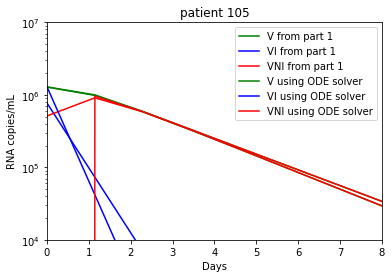

In [63]:
plt.plot(t,VstepV, label = 'V from part 1',c = 'g')
plt.plot(t,VstepVI,label = 'VI from part 1',c = 'b')
plt.plot(t,VstepVNI,label = 'VNI from part 1',c = 'r')
plt.yscale('log')
plt.xlim(0,8)
plt.ylim(1e4,1e7)
plt.xlim(0,8)
plt.legend()
plt.title('patient 105')

Tstar0 = (c*V0)/(N*d)
ODEsol = myodeint3(3,.5,643000,11000,delay,1)
V = (ODEsol[:,2]+ODEsol[:,3])
plt.plot(t,V,label = 'V using ODE solver', c = 'g')
plt.plot(t,ODEsol[:,2],label = 'VI using ODE solver',c = 'b')
plt.plot(t,ODEsol[:,3],label = 'VNI using ODE solver',c = 'r')
plt.yscale('log')
plt.ylim(1e4,1e7)
plt.xlim(0,8)
plt.xlabel('Days')
plt.legend()
plt.ylabel('RNA copies/mL')

#The graphs do not align. This may be because the ODE solver minimizes error, and gives a better prediction than 
#the solver in problem 1. 


### (4) Repeat the work that the authors describe in item 12 of their “References and Notes”.

#### (i) Namely, vary the effectiveness factor of the drug (η=1.0, 0.99, 0.95, and 0.90) and simulate the viral load that would result from the modified differential equations using the parameters c=3.0 days$^{-1}$ and δ=0.5 days$^{-1}$ as described in item 12 and the values of T0, V0, and the time delay provided for patient 105.

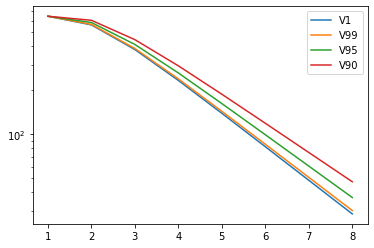

In [98]:
delay = np.zeros(8)
for i in range(8):
    delay[i] = t[i] + .25

ODEsol1 = myodeint(3,.5,V0,T0,delay,gnu =1)
ODEsol99 = myodeint(3,.5,V0,T0,delay,gnu=.99)
ODEsol95 = myodeint(3,.5,V0,T0,delay,gnu=.95)
ODEsol90 = myodeint(3,.5,V0,T0,delay,gnu=.90)
V1 = ODEsol1[:,2]+ODEsol1[:,3]
V99 = ODEsol99[:,2]+ODEsol99[:,3]
V95 = ODEsol95[:,2]+ODEsol95[:,3]
V90 = ODEsol90[:,2]+ODEsol90[:,3]

plt.plot(t,V1,label = 'V1')
plt.plot(t,V99,label = 'V99')
plt.plot(t,V95,label = 'V95')
plt.plot(t,V90,label = 'V90')
plt.yscale('log')
plt.legend()

#### (ii) Then, use the function `scipy.optimize.leastsq` to fit this data to the equation for V(t) given in the paper and find the estimates of c and δ that result. Fit only the portion of the curve after the pharmacokinetic delay. Compare these estimates to the actual values for c and δ and discuss the consequences of an imperfect drug on clearance time estimates.

In [53]:
def plasmavirion3(initial,V0,t): 
    c, d = initial 
    x = c/(c-d)
    VI = V0*np.exp(-c*t)
    VNI = x*V0*(x*(np.exp(-d*t)-np.exp(-c*t))-(d*t*np.exp(-c*t)))
    V = VI + VNI
    hold = np.array([VI,VNI,V])
    return hold[2]

In [54]:
def myodeint1(array,V0,T0,t,gnu):
    c,d = array
    k = 3.43e-8
    N = c/(k*T0)
    VI0 = V0
    VNI0 = 0
    Tstar0 = (c*V0)/(N*d)
    initial = [T0,Tstar0,VI0,VNI0]
    ODEsol = odeint(derivative,initial,t, args=(k,c,d,N,gnu))
    return ODEsol

fitted c and delta for gnu = 1.0: [2.03270632 0.52459356]
fitted c and delta for gnu = .99: [2.03691502 0.51747657]
fitted c and delta for gnu = .95: [2.05341168 0.48966114]
fitted c and delta for gnu = .90: [2.07338457 0.45623349]


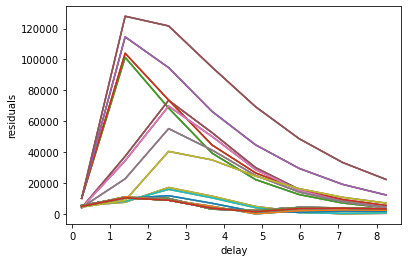

In [168]:
from scipy.optimize import least_squares



#here V1 is the ode solution with GNU = 1 that I found in 4i
def findresiduals(initial,V0,T0,delay,gnu):
    w = [3,.5]
    Vactual = 2*(myodeint1(w,V0,T0,delay,gnu)[:,2]+myodeint1(w,V0,T0,delay,gnu)[:,3])
    for i in range(len(t)):
        Vnew[i] = 2*plasmavirion3(initial,V0,delay[i])
    plt.plot(delay,np.abs(Vnew-Vactual))
    plt.xlabel('delay')
    plt.ylabel('residuals')
    return np.abs(Vnew-Vactual)

def leastsquares(c,d,V0,delay,T0,gnu):
    initial = [c,d]
    res = least_squares(findresiduals,initial,args = [V0,T0,delay,gnu])
    return res.x


Vnew = np.zeros(8)
solution = leastsquares(3,.5,V0,delay,T0,1.0)
print('fitted c and delta for gnu = 1.0:', solution)

solution1 = leastsquares(3,.5,V0,delay,T0,.99)
print('fitted c and delta for gnu = .99:', solution1)

solution2 = leastsquares(3,.5,V0,delay,T0,.95)
print('fitted c and delta for gnu = .95:', solution2)

solution3 = leastsquares(3,.5,V0,delay,T0,.90)
print('fitted c and delta for gnu = .90:', solution3)

#### (iii) Examine the residual plots from your fits to determine whether or not there is a trend in the error associated with fitting these new curves.

In [ ]:
#Each time I call the least squared function, the function runs the residuals function several times. Each time 
#it runs the residuals function it is able to fit the parameters better yielding smaller and smaller residuals seen in
#the bottom grouping of lines. There is less error as the residuals get smaller. 

### (5) To determine the TCID50 one should estimate an infectivity coefficient.

To calculate the infectivity coefficient, estimate the ratio of $V_I(t=0)$ to the value of TCID50(t=0) for patient 105 from Perelson’s Figure 1. This coefficient acts as a conversion factor between the number of virions in the infectious pool, $V_I$, and the TCID50, and is an indicator of the efficiency of the HIV-1 transmission.

In [140]:
TCID = 1.2e3
Infectivitycoefficient = TCID/VstepVI[0]
print('the infectivity coefficient is',Infectivitycoefficient)

the infectivity coefficient is 0.001561715553776855
